In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
pwd

'/content'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd //content/drive/MyDrive/

/content/drive/MyDrive


In [5]:
!unzip Flowers-Dataset.zip

Archive:  Flowers-Dataset.zip
replace flowers/daisy/100080576_f52e8ee070_n.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/1055

In [6]:
pwd

'/content/drive/MyDrive'

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
train_datagen = ImageDataGenerator(rescale= 1./255,horizontal_flip = True,vertical_flip =True,zoom_range = 0.2)

In [9]:
test_datagen = ImageDataGenerator(rescale= 1./255)


In [10]:
pwd

'/content/drive/MyDrive'

In [11]:
x_train =train_datagen.flow_from_directory(r"/content/drive/MyDrive/flowers",target_size = (64,64), class_mode = "categorical",batch_size = 24)


Found 4317 images belonging to 5 classes.


In [12]:
x_test =test_datagen.flow_from_directory(r"/content/drive/MyDrive/flowers",target_size = (64,64),class_mode = "categorical",batch_size = 24)


Found 4317 images belonging to 5 classes.


In [13]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten

In [15]:
model=Sequential()

In [16]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [17]:
32*(3*3*3+1)

896

In [18]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [19]:
model.add(Dense(5,activation='softmax'))

In [20]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
len(x_train)

180

In [21]:
4317/24
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=5)


Epoch 1/5
180/180 [==============================] - 73s 400ms/step - loss: 1.3924 - accuracy: 0.4515 - val_loss: 1.1294 - val_accuracy: 0.5576
Epoch 2/5
180/180 [==============================] - 70s 389ms/step - loss: 1.0626 - accuracy: 0.5724 - val_loss: 1.0238 - val_accuracy: 0.6041
Epoch 3/5
180/180 [==============================] - 70s 387ms/step - loss: 0.9802 - accuracy: 0.6183 - val_loss: 0.9478 - val_accuracy: 0.6324
Epoch 4/5
180/180 [==============================] - 70s 390ms/step - loss: 0.9267 - accuracy: 0.6410 - val_loss: 0.9517 - val_accuracy: 0.6393
Epoch 5/5
180/180 [==============================] - 70s 391ms/step - loss: 0.9113 - accuracy: 0.6407 - val_loss: 0.9297 - val_accuracy: 0.6421


In [22]:
model.save('flowers.h5')

In [23]:
ls flowers/

daisy/  dandelion/  rose/  sunflower/  tulip/


In [24]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

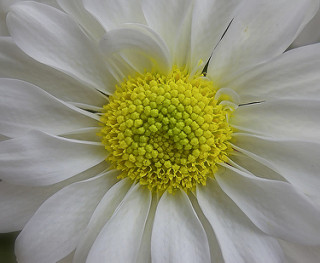

In [25]:
model=load_model('flowers.h5')
img=image.load_img('/content/drive/MyDrive/flowers/daisy/100080576_f52e8ee070_n.jpg')
img

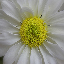

In [26]:
img=image.load_img('/content/drive/MyDrive/flowers/daisy/100080576_f52e8ee070_n.jpg',target_size=(64,64))
img

In [27]:
x=image.img_to_array(img)
x

array([[[141., 141., 139.],
        [149., 149., 149.],
        [152., 152., 154.],
        ...,
        [162., 161., 166.],
        [154., 154., 152.],
        [153., 153., 153.]],

       [[136., 135., 131.],
        [146., 145., 143.],
        [169., 168., 174.],
        ...,
        [159., 158., 163.],
        [155., 155., 153.],
        [149., 149., 149.]],

       [[125., 125., 117.],
        [138., 140., 137.],
        [152., 152., 152.],
        ...,
        [156., 156., 156.],
        [157., 157., 155.],
        [143., 142., 140.]],

       ...,

       [[ 41.,  44.,  23.],
        [ 43.,  46.,  25.],
        [ 49.,  51.,  37.],
        ...,
        [128., 124., 121.],
        [125., 121., 118.],
        [125., 122., 117.]],

       [[ 43.,  46.,  25.],
        [ 43.,  46.,  25.],
        [ 54.,  55.,  37.],
        ...,
        [130., 126., 125.],
        [129., 125., 124.],
        [127., 123., 122.]],

       [[ 44.,  47.,  26.],
        [ 45.,  48.,  27.],
        [ 53.,  

In [28]:
x=np.expand_dims(x,axis=0)
x

array([[[[141., 141., 139.],
         [149., 149., 149.],
         [152., 152., 154.],
         ...,
         [162., 161., 166.],
         [154., 154., 152.],
         [153., 153., 153.]],

        [[136., 135., 131.],
         [146., 145., 143.],
         [169., 168., 174.],
         ...,
         [159., 158., 163.],
         [155., 155., 153.],
         [149., 149., 149.]],

        [[125., 125., 117.],
         [138., 140., 137.],
         [152., 152., 152.],
         ...,
         [156., 156., 156.],
         [157., 157., 155.],
         [143., 142., 140.]],

        ...,

        [[ 41.,  44.,  23.],
         [ 43.,  46.,  25.],
         [ 49.,  51.,  37.],
         ...,
         [128., 124., 121.],
         [125., 121., 118.],
         [125., 122., 117.]],

        [[ 43.,  46.,  25.],
         [ 43.,  46.,  25.],
         [ 54.,  55.,  37.],
         ...,
         [130., 126., 125.],
         [129., 125., 124.],
         [127., 123., 122.]],

        [[ 44.,  47.,  26.],
       

In [29]:
y=np.argmax(model.predict(x),axis=1)
y

1/1 [==============================] - 0s 145ms/step


array([3])

In [30]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [31]:
index=['daisy','dandelion','rose','sunflower']
index[y[0]]

'sunflower'

In [32]:
img=image.load_img('/content/drive/MyDrive/flowers/dandelion/10200780773_c6051a7d71_n.jpg',target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['dandelion','daisy','rose','sunflower']
index[y[0]]

1/1 [==============================] - 0s 29ms/step


'dandelion'

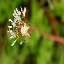

In [33]:
img

In [34]:
img=image.load_img('/content/drive/MyDrive/flowers/daisy/10140303196_b88d3d6cec.jpg',target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['daisy','dandelion','rose','sunflower']
index[y[0]]

1/1 [==============================] - 0s 26ms/step


'sunflower'

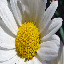

In [35]:
img

In [36]:
img=image.load_img('/content/drive/MyDrive/flowers/sunflower/10386540696_0a95ee53a8_n.jpg',target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['sunflower','daisy','dandelion','rose','tulip']
index[y[0]]

1/1 [==============================] - 0s 24ms/step


'tulip'

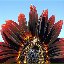

In [37]:
img